# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project: Finding Donors for *CharityML*

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Please specify WHICH VERSION OF PYTHON you are using when submitting this notebook. Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will employ several supervised algorithms of your choice to accurately model individuals' income using data collected from the 1994 U.S. Census. You will then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data. Your goal with this implementation is to construct a model that accurately predicts whether an individual makes more than $50,000. This sort of task can arise in a non-profit setting, where organizations survive on donations.  Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with.  While it can be difficult to determine an individual's general income bracket directly from public sources, we can (as we will see) infer this value from other publically available features. 

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_. You can find the article by Ron Kohavi [online](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). The data we investigate here consists of small changes to the original dataset, such as removing the `'fnlwgt'` feature and records with missing or ill-formatted entries.

----
## Exploring the Data
Run the code cell below to load necessary Python libraries and load the census data. Note that the last column from this dataset, `'income'`, will be our target label (whether an individual makes more than, or at most, $50,000 annually). All other columns are features about each individual in the census database.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("census.csv")

# Success - Display the first record
display(data.head(n=1))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K


### Implementation: Data Exploration
A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000. In the code cell below, you will need to compute the following:
- The total number of records, `'n_records'`
- The number of individuals making more than \$50,000 annually, `'n_greater_50k'`.
- The number of individuals making at most \$50,000 annually, `'n_at_most_50k'`.
- The percentage of individuals making more than \$50,000 annually, `'greater_percent'`.

**Hint:** You may need to look at the table above to understand how the `'income'` entries are formatted. 

In [2]:
#list possible values of the income columns, etc
print 'income', data['income'].unique()
print 'workclass', data['workclass'].unique()
print 'education_level', data['education_level'].unique()
print 'marital-status', data['marital-status'].unique()
print 'occupation', data['occupation'].unique()
print 'relationship', data['relationship'].unique()
print 'sex', data['sex'].unique()
print 'race', data['race'].unique()
print 'native-country', data['native-country'].unique()

income ['<=50K' '>50K']
workclass [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']
education_level [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th']
marital-status [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Transport-moving' ' Farming-fishing'
 ' Machine-op-inspct' ' Tech-support' ' Craft-repair' ' Protective-serv'
 ' Armed-Forces' ' Priv-house-serv']
relationship [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
sex [' Male' ' Female']
race [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
native-country [' United-States' ' Cuba' ' Jamaica' ' Indi

In [3]:
# TODO: Total number of records
n_records = len(data)

# TODO: Number of records where individual's income is more than $50,000
n_greater_50k = len(data[data['income'] == '>50K'])

# TODO: Number of records where individual's income is at most $50,000
n_at_most_50k = len(data[data['income'] == '<=50K'])

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = n_greater_50k * 100.0/n_records

# Print the results
print "Total number of records: {}".format(n_records)
print "Individuals making more than $50,000: {}".format(n_greater_50k)
print "Individuals making at most $50,000: {}".format(n_at_most_50k)
print "Percentage of individuals making more than $50,000: {:.2f}%".format(greater_percent)

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78%


----
## Preparing the Data
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

### Transforming Skewed Continuous Features
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number.  Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With the census dataset two features fit this description: '`capital-gain'` and `'capital-loss'`. 

Run the code cell below to plot a histogram of these two features. Note the range of the values present and how they are distributed.

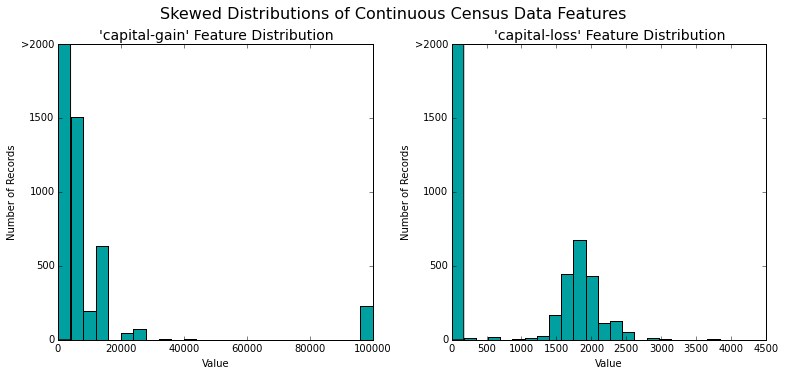

In [4]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)

For highly-skewed feature distributions such as `'capital-gain'` and `'capital-loss'`, it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the the logarithm successfully.

Run the code cell below to perform a transformation on the data and visualize the results. Again, note the range of values and how they are distributed. 

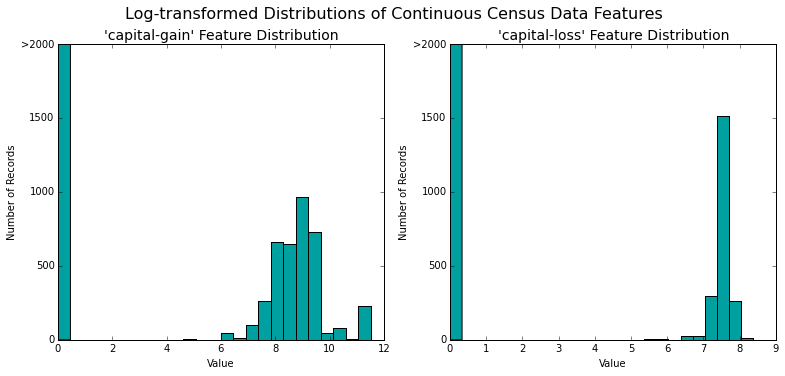

In [5]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_raw[skewed] = data[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_raw, transformed = True)

### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `'capital-gain'` or `'capital-loss'` above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

Run the code cell below to normalize each numerical feature. We will use [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for this.

In [6]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler()
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
features_raw[numerical] = scaler.fit_transform(features_raw[numerical])

# Show an example of a record with scaling applied
print 'original data'
display(data.head(n=1))
print 'after scaling applied'
display(features_raw.head(n = 1))

original data


,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K


after scaling applied


,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.30137,State-gov,Bachelors,0.8,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States


### Implementation: Data Preprocessing

From the table in **Exploring the Data** above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

Additionally, as with the non-numeric features, we need to convert the non-numeric target label, `'income'` to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("<=50K" and ">50K"), we can avoid using one-hot encoding and simply encode these two categories as `0` and `1`, respectively. In code cell below, you will need to implement the following:
 - Use [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) to perform one-hot encoding on the `'features_raw'` data.
 - Convert the target label `'income_raw'` to numerical entries.
   - Set records with "<=50K" to `0` and records with ">50K" to `1`.

In [7]:
# TODO: One-hot encode the 'features_raw' data using pandas.get_dummies()
features = pd.get_dummies(features_raw)
print 'features'
display(features.head())

# TODO: Encode the 'income_raw' data to numerical values
income = income_raw.map({'<=50K': 0, '>50K': 1})
print 'income raw'
display(income_raw.head(10))
print 'encoded income'
display(income.head(10))

# Print the number of features after one-hot encoding
encoded = list(features.columns)
print "{} total features after one-hot encoding.".format(len(encoded))

# Uncomment the following line to see the encoded feature names
print encoded

features


,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.301370,0.800000,0.667492,0.0,0.397959,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.452055,0.800000,0.000000,0.0,0.122449,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0.287671,0.533333,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.493151,0.400000,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.150685,0.800000,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


income raw


0    <=50K
1    <=50K
2    <=50K
3    <=50K
4    <=50K
5    <=50K
6    <=50K
7     >50K
8     >50K
9     >50K
Name: income, dtype: object

encoded income


0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    1
9    1
Name: income, dtype: int64

103 total features after one-hot encoding.
['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_level_ 10th', 'education_level_ 11th', 'education_level_ 12th', 'education_level_ 1st-4th', 'education_level_ 5th-6th', 'education_level_ 7th-8th', 'education_level_ 9th', 'education_level_ Assoc-acdm', 'education_level_ Assoc-voc', 'education_level_ Bachelors', 'education_level_ Doctorate', 'education_level_ HS-grad', 'education_level_ Masters', 'education_level_ Preschool', 'education_level_ Prof-school', 'education_level_ Some-college', 'marital-status_ Divorced', 'marital-status_ Married-AF-spouse', 'marital-status_ Married-civ-spouse', 'marital-status_ Married-spouse-absent', 'marital-status_ Never-married', 'marital-status_ Separated', 'marital-status_ Widowed', 'occupation_ A

### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

Run the code cell below to perform this split.

In [8]:
# Import train_test_split
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, income, test_size = 0.2, random_state = 0)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 36177 samples.
Testing set has 9045 samples.


/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


----
## Evaluating Model Performance
In this section, we will investigate four different algorithms, and determine which is best at modeling the data. Three of these algorithms will be supervised learners of your choice, and the fourth algorithm is known as a *naive predictor*.

### Metrics and the Naive Predictor
*CharityML*, equipped with their research, knows individuals that make more than \$50,000 are most likely to donate to their charity. Because of this, *CharityML* is particularly interested in predicting who makes more than \$50,000 accurately. It would seem that using **accuracy** as a metric for evaluating a particular model's performace would be appropriate. Additionally, identifying someone that *does not* make more than \$50,000 as someone who does would be detrimental to *CharityML*, since they are looking to find individuals willing to donate. Therefore, a model's ability to precisely predict those that make more than \$50,000 is *more important* than the model's ability to **recall** those individuals. We can use **F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).

Looking at the distribution of classes (those who make at most \$50,000, and those who make more), it's clear most individuals do not make more than \$50,000. This can greatly affect **accuracy**, since we could simply say *"this person does not make more than \$50,000"* and generally be right, without ever looking at the data! Making such a statement would be called **naive**, since we have not considered any information to substantiate the claim. It is always important to consider the *naive prediction* for your data, to help establish a benchmark for whether a model is performing well. That been said, using that prediction would be pointless: If we predicted all people made less than \$50,000, *CharityML* would identify no one as donors. 

### Question 1 - Naive Predictor Performace
*If we chose a model that always predicted an individual made more than \$50,000, what would that model's accuracy and F-score be on this dataset?*  
**Note:** You must use the code cell below and assign your results to `'accuracy'` and `'fscore'` to be used later.

In [10]:
from sklearn.metrics import accuracy_score, fbeta_score

pred = np.ones(n_records)

# TODO: Calculate accuracy
accuracy = accuracy_score(income, pred)

# TODO: Calculate F-score using the formula above for beta = 0.5
fscore_from_sklearn = fbeta_score(income, pred, 0.5)
#calculaet fscore using formula above
from sklearn.metrics import recall_score, precision_score
def fbeta_score_from_formula(income, pred, beta):
    recall = recall_score(income, pred)
    precision = precision_score(income, pred)
    return (1 + beta**2)*precision*recall/((beta**2 * precision) + recall)
fscore = fbeta_score_from_formula(income, pred, 0.5)
# Print the results 
print "Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}, F-score-from_sklearn: {:.4f}]".format(accuracy, fscore, fscore_from_sklearn)

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917, F-score-from_sklearn: 0.2917]


###  Supervised Learning Models
**The following supervised learning models are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
List three of the supervised learning models above that are appropriate for this problem that you will test on the census data. For each model chosen
- *Describe one real-world application in industry where the model can be applied.* (You may need to do research for this — give references!)
- *What are the strengths of the model; when does it perform well?*
- *What are the weaknesses of the model; when does it perform poorly?*
- *What makes this model a good candidate for the problem, given what you know about the data?*

**Answer: **
Our problem is a binary classification problem, whether a person is making more or less than 50K. With a lot of features is a categorical data type.

**The following supervised learning models, which is available from sklearn are chosen,**
1. Gaussian Naive Bayes (GaussianNB)
    - application
        - text categorization
        - spam filtering
        - medical diagnosis
    - strength
        - scalable, requiring a number of parameters linear in the number of features. which makes it able to handle a lot of features (fewer parameters means less chance of overfitting)
        - fast training speed, maximum likelihood training can be done by closed form expression, and take linear time
        - can work with small number of training data to estimate the parameters necessary for classification
        - Decoupling of the class conditional feature distributions means each distribution can be independently estimated as a one dimensional distribution. Which helps to alleviate problems stemming from the curse of dimensionality.
        - efficiency, training and classification can be accomplished with one pass over the data
        - when very large amount of training data is available, and there is more to be gained from training on a lot of data than using a better classifier on a smaller training set.
        - Even with strong dependency among features, if those dependencies cancel each other out, there is no influence no classification, and naive bayes still works well.
        - no need for parameter tuning
    - weakness
        - naive independence assumptions between the features (although independence is generally a poor assumption, in practice naive bayes often competes well with more sophisticated classifier)
        - performs poorly if features are heavily dependent, can't learn interactions between features
        - zero frequency features (i.e. feature which has probability of zero), will break Naive bayes classifier, and need special handling e.g. add a small value instead of allowing it to go to zero)
        - doesn't work well on regression problem
        - the model learned with a small number of training samples have very high variance but as the training data is increased, the variance decrease significantly. The naive bayes classifier has low variance even with very little data. However, the independent assumption of naive bayes results in high bias.
    - applicability
        - works well on most classification tasks, although the probability estimates that it produces can be inaccurate, it often assigns maximum probability to the correct class.
        - training and classification can be accomplished with one pass.
        - after one hot encoding, we have 103 features, naive bayes is both efficient and scalable, can handle lot of features well.
        - fewer parameters means less chance for overfitting.
        - no parameter tuning required
        - despite, the strong assumption of features independency, Naive bayes usually work well in practice. and it combines efficiency with good accuracy, it is chosen to serve as a baseline in this exercise
    - reference
        - [Wikipedia: Naive Bayes Classifier](https://en.wikipedia.org/wiki/Naive_Bayes_classifier)
        - [sklearn, Naive Bayes documentation](http://scikit-learn.org/stable/modules/naive_bayes.html)
        - [Zhang, Harry (2004), The Optimality of Naive Bayes](http://www.cs.unb.ca/~hzhang/publications/FLAIRS04ZhangH.pdf)
        - [Naive Bayes for Regression](http://www.cs.waikato.ac.nz/~eibe/pubs/nbr.pdf)        
2. Random forests are an ensemble learning method for classification.
    - application
        - genetics and neuroscience
    - strength
        - The bias of the forest usually is slightly higher (as compared to the bias of a single non random decision tree) but, due to averaging, its variance will decrease, and usually more than compensating for the increase in bias, hence yielding an overall better model.
        - less prone to overfitting as compared to regular Decision tree.
        - fast to train, 
        - requires little data preparation
        - can handle feature interactions, and they are non parametric. It can handle situations where there are many variables which interact in complicated, nonlinear way.
        - able to handle both numerical and categorical data.
        - robust to outliers and misclassified points in the training set (since they do not make assumptions on the variable's distribution when constructing axis splits)
    - weakness
        - results of learning are incomprehensible, as compared to Decision Tree. they don't give you a lot of insight.(black box model)
        - don't support online learning, rebuild model when new data comes in.
        - can easily overfit, mechanism such as pruning, setting the maximum number of samples required at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem. And due to averaging, the variance is usually lower than Decision Tree.
        - can be unstable because small variations in the data might result in a completely different tree being generated. (this problem is mitigated by using decision trees within an ensemble)
        - high variance classifier, sensitive to the precise layout of points and if you have less data, can fit to noise.
        - impossible to predict beyond the mimimum and maximum limits of the response variable in the training data
        - depending on the complexity of the model, it may be slow in prediction.
    - applicability
        - no data preparation required (although we already did), fast to train.
        - generally performs better than decision tree, and since we are dealing with classification problem, random forest seems to be a natural choice
    - reference
        - [Wikipedia: Random forest](https://en.wikipedia.org/wiki/Random_forest)
        - [sklearn, Ensemble methods documentation](http://scikit-learn.org/stable/modules/ensemble.html#forests-of-randomized-trees)
3. Support Vector Machines (SVM)
    - application
        - text classification problem
    - strength
        - works when training samples contains errors
        - you can model non linear relations by plugging in proper kernel
        - effective in high dimensional space
    - weakness
        - extensive memory requirement, their compute and storage requirements increase rapidly with the number of training vectors.
        - hard to interpret
        - user need to tune the proper parameters for regularization and kernel, in order to combat the effect of overfitting.
        - speed in training and testing
        - if number of features is much greater than the number of samples, the method is likely to give poor performances.
    - applicability
        - our problem is a binary classification problem, svm will be a good candidate for this type of problem.
        - SVMs are originally developed for binary classification and later on extended to handle multiclass.
    - reference. 
        - [sklearn, support vector machines](http://scikit-learn.org/stable/modules.svm.html)

    
**reference**
1. [choosing a machine learning classifier](http://blog.echen.me/2011/04/27/choosing-a-machine-learning-classifier')
2. [Comparing supervised learning algorithms", Data School 2015](http://www.dataschool.io/comparing-supervised-learning-algorithms)


### Implementation - Creating a Training and Predicting Pipeline
To properly evaluate the performance of each model you've chosen, it's important that you create a training and predicting pipeline that allows you to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. Your implementation here will be used in the following section.
In the code block below, you will need to implement the following:
 - Import `fbeta_score` and `accuracy_score` from [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
 - Fit the learner to the sampled training data and record the training time.
 - Perform predictions on the test data `X_test`, and also on the first 300 training points `X_train[:300]`.
   - Record the total prediction time.
 - Calculate the accuracy score for both the training subset and testing set.
 - Calculate the F-score for both the training subset and testing set.
   - Make sure that you set the `beta` parameter!

In [10]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size'
    start = time() # Get start time
    #take a random sample of the training data of size sample_size
    sample_rows = np.random.choice(X_train.index.values, size = sample_size, replace = False)
    learner.fit(X_train.ix[sample_rows], y_train.ix[sample_rows])
    #learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set,
    #       then get predictions on the first 300 training samples
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy on the first 300 training samples
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # TODO: Compute accuracy on test set
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    beta = 0.5
    # TODO: Compute F-score on the the first 300 training samples
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta)
        
    # TODO: Compute F-score on the test set
    results['f_test'] = fbeta_score(y_test, predictions_test, beta)
       
    # Success
    print "{} trained on {} samples.".format(learner.__class__.__name__, sample_size)
        
    # Return the results
    return results

### Implementation: Initial Model Evaluation
In the code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `'clf_A'`, `'clf_B'`, and `'clf_C'`.
  - Use a `'random_state'` for each model you use, if provided.
  - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Calculate the number of records equal to 1%, 10%, and 100% of the training data.
  - Store those values in `'samples_1'`, `'samples_10'`, and `'samples_100'` respectively.

**Note:** Depending on which algorithms you chose, the following implementation may take some time to run!

GaussianNB trained on 362 samples.
GaussianNB trained on 3618 samples.
GaussianNB trained on 36177 samples.
RandomForestClassifier trained on 362 samples.
RandomForestClassifier trained on 3618 samples.
RandomForestClassifier trained on 36177 samples.
SVC trained on 362 samples.
SVC trained on 3618 samples.
SVC trained on 36177 samples.


/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


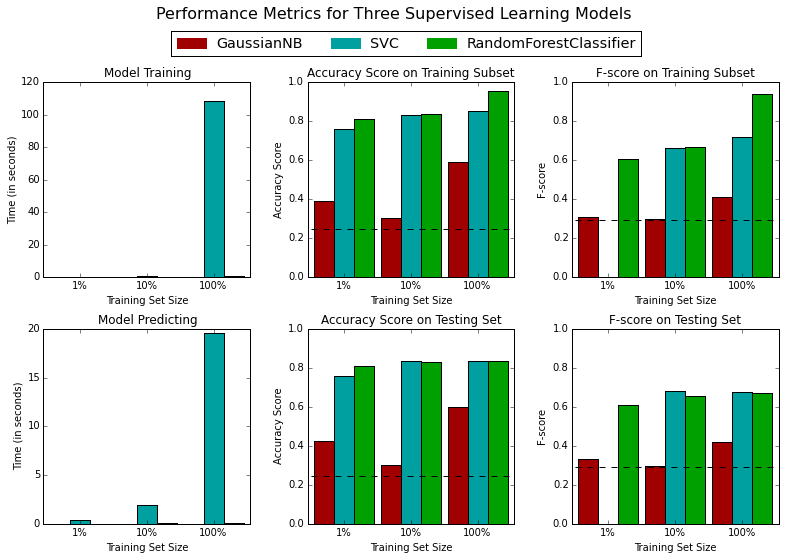

In [11]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# TODO: Initialize the three models
clf_A = GaussianNB()
clf_B = RandomForestClassifier(random_state=0)
clf_C = SVC(random_state=0)

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_1 = int(round(X_train.shape[0]*0.01))
samples_10 = int(round(X_train.shape[0]*0.1))
samples_100 = X_train.shape[0]

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

----
## Improving Results
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F-score. 

### Question 3 - Choosing the Best Model
*Based on the evaluation you performed earlier, in one to two paragraphs, explain to *CharityML* which of the three models you believe to be most appropriate for the task of identifying individuals that make more than \$50,000.*  
**Hint:** Your answer should include discussion of the metrics, prediction/training time, and the algorithm's suitability for the data.

**Answer: **

| Model         | Training Time(s) | Prediction Time(s) | Accuracy(%) | F-Score(%) |
|---------------|------------------|--------------------|-------------|------------|
| Naive Bayes   |             0.067|             0.01849|        60.45|       42.50|
| Random Forest |             0.677|             0.09688|        83.92|       67.46|
| SVM           |           108.495|            19.49525|        83.71|       67.45|

- **Train Time**, SVM took a much longer time to train the data, while random forest and Naive bayes took approximately same amount of time
- **Prediction Time**, SVM took a much longer time to predict the result base on input, while random forest and Naive bayes performs much better, and took approximately same amount of time in making prediction.
- **Accuracy**, Naive bayes seems to perform poorly, while random forest and SVM seems to have similar accuracy, but random forest seems to show sign of overfitting. (accuracy on training set is 0.96 while on test set it is 0.84)
- **F-Score**, which is another method on accuracy, show similar result. Naive bayes perform poorly, while random forest and SVM seems to have similar performance. And random forest seems to show sign of overfitting.

Based on the performance metrics result above, Naive bayes performs poorly, whiile random forest has similar performance as SVM in terms of accuracy and F-Score. However the training/prediction time is much shorter for random forest, and hence will be more scalable than SVM when processing larger data set.

Hence random forest model is chosen as the preferred model.


### Question 4 - Describing the Model in Layman's Terms
*In one to two paragraphs, explain to *CharityML*, in layman's terms, how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical or technical jargon, such as describing equations or discussing the algorithm implementation.*

**Answer: ** 

We have chosen random forest as the model, in order to understand how it works, we have to first understand how it works with Decision Tree.

A decision tree is constructed by asking a series of question on whether you belong to a certain group. At each point, we consider all of questions that can partition our data set. 

Not all questions are equal, we choose the question that provides the best split (often the criteria is to maximize the information gain), and create subtree. We continue to partition our data set using this methodology, until when splitting no longer add value to the predictions or when the subset at a node all has the same value for the target variable.

random forest usea a lot of decision trees (ensemble) where each tree is a little bit different from others. When we predict, we take the majority vote of the ensemble to get the final result.

In order to have each tree to be a little bit different, we used random samples of the observations to train them, and each see different part of the data, and we used a subset of the features for each tree.

The key is each tree becomes a little bit different (i.e. less correlated), and then we perform the majority vote 

The predictions from random forest are often better than individual decision tree, for example due to averaging we will expect the variance will decrease as compared to a single decision tree, and hence produce a better model.


### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Initialize the classifier you've chosen and store it in `clf`.
 - Set a `random_state` if one is available to the same state you set before.
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
 - **Note:** Avoid tuning the `max_features` parameter of your learner if that parameter is available!
- Use `make_scorer` to create an `fbeta_score` scoring object (with $\beta = 0.5$).
- Perform grid search on the classifier `clf` using the `'scorer'`, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_fit`.

**Note:** Depending on the algorithm chosen and the parameter list, the following implementation may take some time to run!

In [16]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestClassifier

# TODO: Initialize the classifier
clf = RandomForestClassifier(random_state = 0)

# TODO: Create the parameters list you wish to tune
parameters = {
                'n_estimators'     : [ 5, 10, 25, 50, 75, 100],
                'max_depth'        : [None, 2, 5, 10, 25, 50],
                'max_features'     : ['auto', 'sqrt', 'log2', None],
             }

# TODO: Make an fbeta_score scoring object
def score_wrapper(y_true, y_predict):
    return fbeta_score(y_true, y_predict, 0.5)

scorer = make_scorer(score_wrapper)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method
grid_obj = GridSearchCV(estimator=clf, param_grid=parameters, scoring=scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print "Unoptimized model\n------"
print "Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5))
print "\nOptimized Model\n------"
print "Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))

Unoptimized model
------
Accuracy score on testing data: 0.8378
F-score on testing data: 0.6717

Optimized Model
------
Final accuracy score on the testing data: 0.8594
Final F-score on the testing data: 0.7334


### Question 5 - Final Model Evaluation
_What is your optimized model's accuracy and F-score on the testing data? Are these scores better or worse than the unoptimized model? How do the results from your optimized model compare to the naive predictor benchmarks you found earlier in **Question 1**?_  
**Note:** Fill in the table below with your results, and then provide discussion in the **Answer** box.

#### Results:

|     Metric     | Benchmark Predictor | Unoptimized Model | Optimized Model |
| :------------: | :-----------------: | :---------------: | :-------------: | 
| Accuracy Score |               0.2478|             0.8378|           0.8594|
| F-score        |               0.2917|             0.6717|           0.7334|


**Answer: ** 
**what is your optimized model's accuracy and F-score on the testing data?**
    - the optimized model's accuracy on the testing data is 0.8594
    - the optimized model's F-score on the testing data is 0.7334

**Are these scores better or worse than the unoptimized model**
    - These scores are better than the unoptimized model as expected, especially the F-score.
    
**How do the results from your optimized model compare to the naive predictor benchmarks you found earlier in Question 1**
    - both scores are much higher than the naive predictor. 


----
## Feature Importance

An important task when performing supervised learning on a dataset like the census data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual makes at most or more than \$50,000.

Choose a scikit-learn classifier (e.g., adaboost, random forests) that has a `feature_importance_` attribute, which is a function that ranks the importance of features according to the chosen classifier.  In the next python cell fit this classifier to training set and use this attribute to determine the top 5 most important features for the census dataset.

### Question 6 - Feature Relevance Observation
When **Exploring the Data**, it was shown there are thirteen available features for each individual on record in the census data.  
_Of these thirteen records, which five features do you believe to be most important for prediction, and in what order would you rank them and why?_

In [18]:
print features_raw.columns

Index([u'age', u'workclass', u'education_level', u'education-num',
       u'marital-status', u'occupation', u'relationship', u'race', u'sex',
       u'capital-gain', u'capital-loss', u'hours-per-week', u'native-country'],
      dtype='object')


**Answer:**
out of these thirteen features, the five features i believe to be most important for prediction in the order of decreasing importance is as follows,
- age, compensation usually increase with age and reach a maximum around 50-60, then it will decrease as the person enter retirement.
- education_level, assuming better educated person will have better chance landing job with higher salary.
- occupation, some professional occupation command a higher salary, e.g. doctor, dentist.
- capital-gain, higher capital-gain usually means the person has earn enough to cover their living expense, and has extra that can spare to invest in various asset to earn capital gain.
- capital-loss, for the same reason as capital gain. even though it is a loss this year, it still indicates the person afford to have extra investment in other assets.



### Implementation - Extracting Feature Importance
Choose a `scikit-learn` supervised learning algorithm that has a `feature_importance_` attribute availble for it. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.

In the code cell below, you will need to implement the following:
 - Import a supervised learning model from sklearn if it is different from the three used earlier.
 - Train the supervised model on the entire training set.
 - Extract the feature importances using `'.feature_importances_'`.

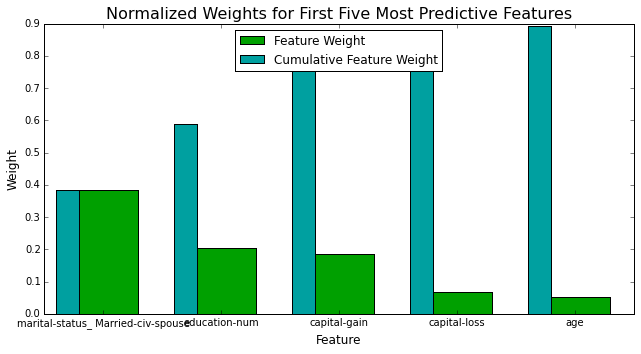

In [19]:
# TODO: Import a supervised learning model that has 'feature_importances_'
# TODO: Train the supervised model on the training set 
model = best_clf  #randomforestclassifier does have feature_importances_ attribute, so we can just reuse best model above


# TODO: Extract the feature importances
importances = model.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

### Question 7 - Extracting Feature Importance

Observe the visualization created above which displays the five most relevant features for predicting if an individual makes at most or above \$50,000.  
_How do these five features compare to the five features you discussed in **Question 6**? If you were close to the same answer, how does this visualization confirm your thoughts? If you were not close, why do you think these features are more relevant?_

**Answer:**
- the model consider the marital status the most important feature, which is kind of surprising. Probably people get married when they are financially stable and secure, they have to support a family.
- I consider the age the most important factor, because usually as a person get more experience, their senority in the organisation is higher, and command a higher salary. But the model only consider age as the 5th important one.
- education, as expected is considered an important feature in predicting the income level.
- Also the capital gain/loss has high predictive power, because it indicates if a person have extra money that can invest in other asset, to earn capital gain or loss.
- It is little surprising, occupation is not in the top 5 important features to predict the income, i will expect it is important to know, because some professional occupation command higher salary like doctor, dentist as compared to other occupation.

### Feature Selection
How does a model perform if we only use a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. From the visualization above, we see that the top five most important features contribute more than half of the importance of **all** features present in the data. This hints that we can attempt to *reduce the feature space* and simplify the information required for the model to learn. The code cell below will use the same optimized model you found earlier, and train it on the same training set *with only the top five important features*. 

In [20]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print "Final Model trained on full data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))
print "\nFinal Model trained on reduced data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5))

Final Model trained on full data
------
Accuracy on testing data: 0.8594
F-score on testing data: 0.7334

Final Model trained on reduced data
------
Accuracy on testing data: 0.8549
F-score on testing data: 0.7238


### Question 8 - Effects of Feature Selection
*How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all features are used?*  
*If training time was a factor, would you consider using the reduced data as your training set?*

**Answer:**
**How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all the features are used?**
    - The final model's F-score and accuracy is 0.7238 and 0.8549 respectively, vs the score using the full feature set which is 0.7334 and 0.8594. The 2 sets of scores are very close.
    
**If training time was a factor, would you consider using the reduced data as your training set?**
    - as the accuracy/F-score is very close using only 5 features vs using full set of features. If time was a factor, i will definitely consider using the reduced data as my training set.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.